In [86]:
#import everything
import re
import os

#Work in the directory with the images
img_path = 'C:\\Users\\evanm\\Documents\\School\\Graduate\\Data\\Hitachi 4300\\191002\\EBSD Scans\\line 1 best scan'
os.chdir(img_path)
os.getcwd()

'C:\\Users\\evanm\\Documents\\School\\Graduate\\Data\\Hitachi 4300\\191002\\EBSD Scans\\line 1 best scan'

In [87]:
#creating lists of variables to add to dataframe
x_lst=[] 
y_lst=[]
for i in os.listdir('.'):
    #extracts x-coordinate
    x = int(re.split("x|y|\.",i)[1])*10
    x_lst.append(x)
    #extracts y-coordinate
    y = int(re.split("x|y|\.",i)[2])*10
    y_lst.append(y)
    #print("x is " + str(x) + " nm and y is " + str(y) + " nm")

In [88]:
#creating a dataframe
import pandas as pd

#grabbing the file path for later use
file_path=[]
for i in os.listdir('.'):
    file_path.append(img_path + '\\' + i)

#Calling DataFrame constructor on list
data = pd.DataFrame({"File Path":file_path, "X":x_lst, "Y":y_lst})

#showing the dataframe
data.head(3)

,File Path,X,Y
0,C:\Users\evanm\Documents\School\Graduate\Data\...,0,0
1,C:\Users\evanm\Documents\School\Graduate\Data\...,0,100020
2,C:\Users\evanm\Documents\School\Graduate\Data\...,0,100450


In [89]:
#definging variables to save the dataframe
parent_path = os.path.dirname(img_path)
data_name = re.split('_',os.listdir('.')[0])[0] + " dataframe.csv"
new_save_name = parent_path + '\\' + data_name

#print the new file's name
print(new_save_name)

C:\Users\evanm\Documents\School\Graduate\Data\Hitachi 4300\191002\EBSD Scans\line 1 best scan dataframe.csv


In [90]:
#save to directory one above
data.to_csv(new_save_name, index=False)

In [91]:
#Move to the directory with the dataframe (for saving new figures later maybe)
os.chdir('C:\\Users\\evanm\\Documents\\School\\Graduate\\Data\\Hitachi 4300\\191002\\EBSD Scans')
os.getcwd()

'C:\\Users\\evanm\\Documents\\School\\Graduate\\Data\\Hitachi 4300\\191002\\EBSD Scans'

In [92]:
#import some more stuff
import numpy as np
import skimage as ski

#creating lists with new features
mean_lst=[]
med_lst=[]
std_lst=[]

#extracting the new features
for ind in data.index:
    file_path = data.at[ind,'File Path']
    image = ski.io.imread(file_path)
    
    mean_lst.append(np.mean(image))
    med_lst.append(np.median(image))
    std_lst.append(np.std(image))

In [93]:
#adding the new features to the data frame
data['Mean'] = mean_lst
data['Median'] = med_lst
data['Std. Dev.'] = std_lst

#does everything in the data frame look alright?
data.head(3)

,File Path,X,Y,Mean,Median,Std. Dev.
0,C:\Users\evanm\Documents\School\Graduate\Data\...,0,0,2399.286589,2409.0,108.162274
1,C:\Users\evanm\Documents\School\Graduate\Data\...,0,100020,2534.410664,2523.0,112.086468
2,C:\Users\evanm\Documents\School\Graduate\Data\...,0,100450,2564.949036,2562.0,179.929117


In [94]:
#save the new features to the data frame
data.to_csv(new_save_name, index=False)

Text(0.5, 1.0, 'Standard Deviation')

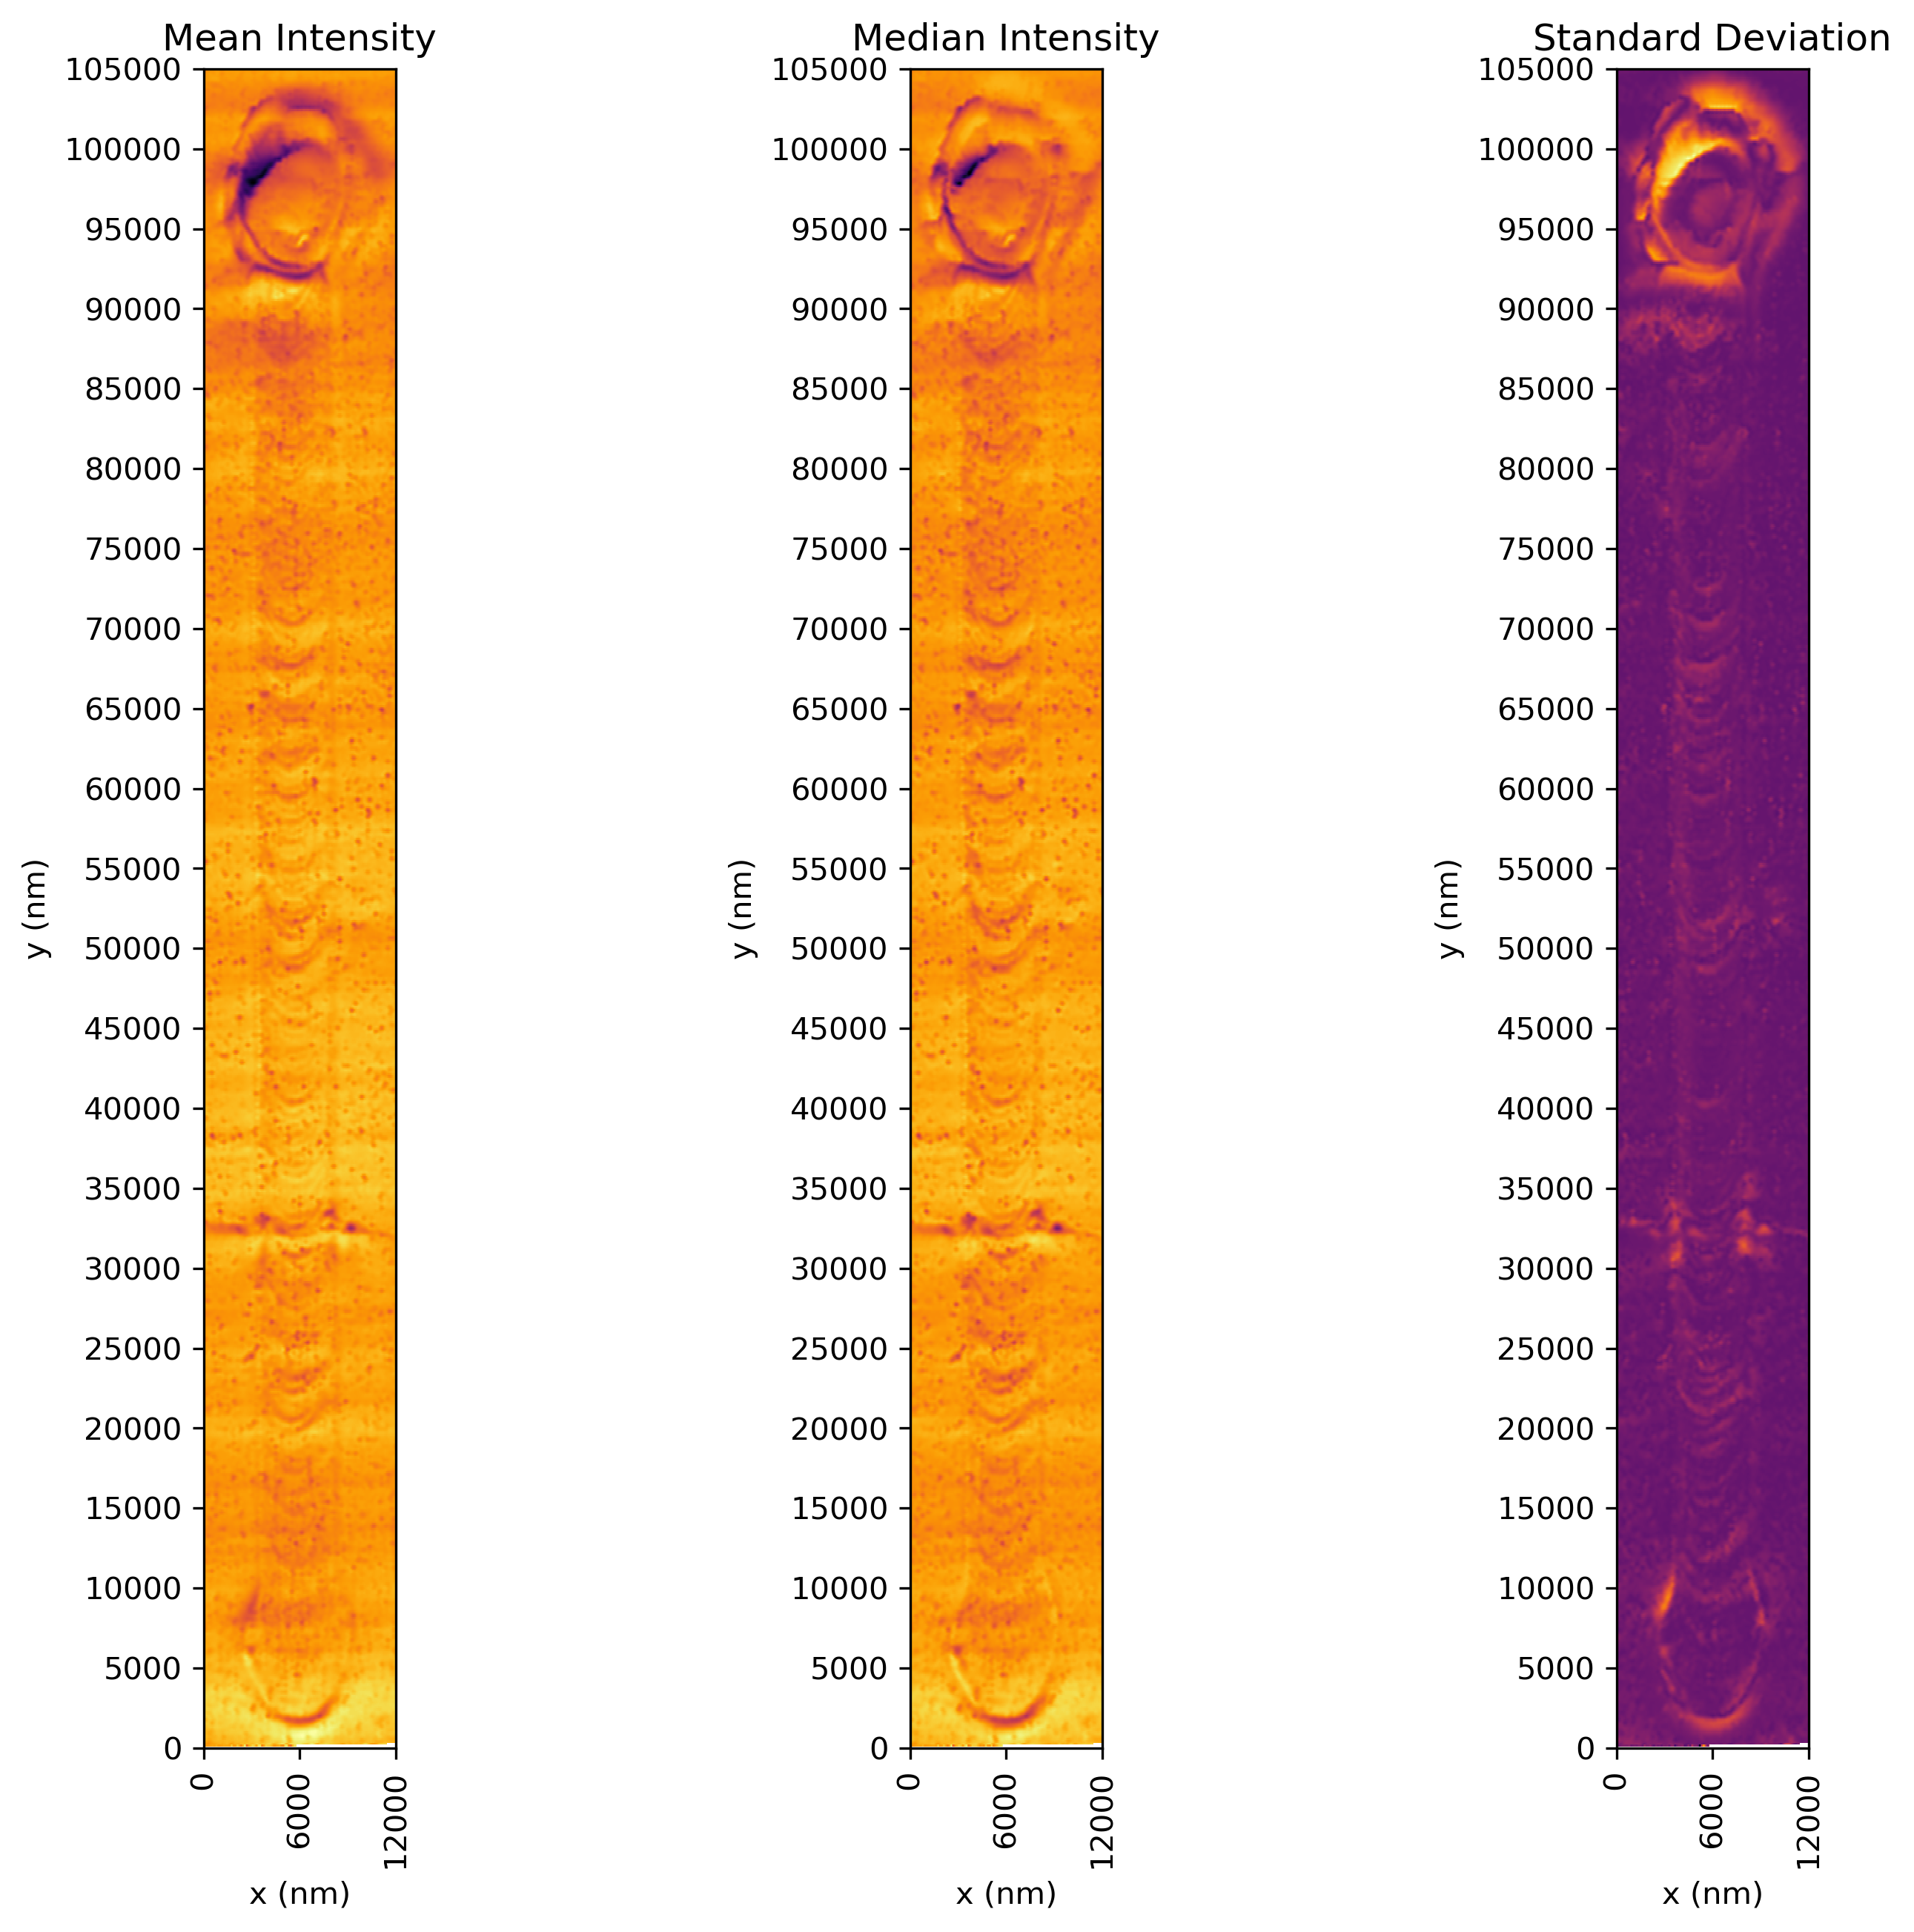

In [95]:
#import some more stuff for plotting purposes
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

#defining variables for plotting
x = data['X'].values
y = data['Y'].values
mean = data['Mean'].values
med = data['Median'].values
std = data['Std. Dev.'].values

#determine grid boundaries
gridsize = 1000
x_min = 0
x_max = 12000
y_min = 0
y_max = 105000

xx = np.linspace(x_min, x_max, gridsize) # array of x values
yy = np.linspace(y_min, y_max, gridsize) # array of y values
grid = np.array(np.meshgrid(xx, yy.T))
grid = grid.reshape(2, grid.shape[1]*grid.shape[2]).T


fig, axs = plt.subplots(1, 3, dpi=300, constrained_layout=False, figsize=(2,10))

for i, j in enumerate([mean,med,std]):

    points = np.array([x, y]).T # because griddata wants it that way
    z_grid2 = griddata(points, j, grid, method='cubic')
    # you get a 1D vector as result. Reshape to picture format!
    z_grid2 = z_grid2.reshape(xx.shape[0], yy.shape[0])

    axs[i].imshow(z_grid2, extent=[x_min, x_max,y_min, y_max],
            origin='upper', cmap=cm.inferno)
    

    #plt.xticks(rotation='90')
    axs[i].set_xlabel('x (nm)')
    axs[i].set_xticks(np.arange(x_min,x_max+1,6000,))
    axs[i].set_ylabel('y (nm)')
    axs[i].set_yticks(np.arange(y_min,y_max+1,5000))
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=90)

#plt.xticks(rotation='90')
plt.subplots_adjust(left=0.5,right=5)
axs[0].set_title('Mean Intensity')
axs[1].set_title('Median Intensity')
axs[2].set_title('Standard Deviation')